In [ ]:
!pip install sentence_transformers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [5]:
from sentence_transformers import SentenceTransformer, models

In [6]:
df = pd.read_csv('/content/drive/MyDrive/test.csv', index_col=0)

In [37]:
from tqdm.notebook import tqdm

In [8]:
df.sample(10)

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description,...,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,years,city,education
658345,48099025,Первый Бит,программист 1c,True,NaN,174000.0,От 1 года до 3 лет,Удаленная работа,"['Работа в команде', 'Умение работать в команд...",Первый Бит – международный интегратор эффектив...,...,полный день,Опыт работы 1 год 7 месяцев Программист 1C 45...,Инженер-программист,Сервисный инженер,Высшее образование 2021 КГТУ Прикладная информ...,22.04.2019 15:13,Не указано,1.0,Калининград,Высшее образование
3601649,49625895,Ай-ком,системный администратор,True,30000.0,NaN,От 3 до 6 лет,Удаленная работа,"['VMware', 'Hyper-V', 'Active Directory', 'Адм...",Инжиниринговая компания I-com является специал...,...,полный день,Опыт работы 12 лет 1 месяц Апрель 2008 — по н...,"ООО ""Заполярпромгражданстрой""",Ведущий инженер,Высшее образование 2010 Удмуртский государств...,21.04.2019 13:38,Не указано,12.0,Новый Уренгой,Высшее образование
1207502,49531556,Акцепт-У,программист,True,70000.0,90000.0,От 1 года до 3 лет,Удаленная работа,"['1С-Битрикс', 'Helpdesk', 'PHP', 'Ответственн...",Digital-студия «Акцепт» ищет в команду разрабо...,...,полный день,Опыт работы 11 лет 6 месяцев Март 2011 — по н...,ЗАО «ИЦ «Уралтехэнерго»,Инженер,Высшее образование 2007 Уральский государстве...,08.04.2019 23:15,Не указано,11.0,Екатеринбург,Высшее образование
330022,50062864,Ребреин,менеджер по продажам,False,NaN,NaN,Нет опыта,Удаленная работа,"['Грамотная речь', 'Ведение переговоров', 'Тел...",Здравствуйте! Мы занимаемся созданием практику...,...,"удаленная работа, гибкий график, полный день, ...",Опыт работы 4 года 7 месяцев Октябрь 2018 — Ф...,"МАДОУ""Детский сад №7 СОЛНЫШКО""",Помощник повара,"Среднее специальное образование 2015 ОАПОУ""Ста...",07.05.2019 11:42,Не указано,4.0,Великий Новгород,Среднее специальное образование
2374697,49924960,Sebekon,менеджер проектов,True,70000.0,150000.0,От 3 до 6 лет,Удаленная работа,[],"Привет! Мы - SEBEKON, компания где разрабатыва...",...,полный день,Опыт работы 11 лет 10 месяцев Июнь 2013 — Июн...,ГИС,Менеджер по продажам услуг,Высшее образование 2016 Тольяттинский государ...,16.04.2019 12:08,Имеется собственный автомобиль,11.0,Тольятти,Высшее образование
2159260,49955292,ХариБэл,менеджер проектов,True,80000.0,NaN,Нет опыта,Удаленная работа,"['Пользователь ПК', 'Работа в команде', 'Делов...",В связи с расширением компании мы ищем ЛУЧШИХ ...,...,полный день,Опыт работы 11 лет 10 месяцев Июнь 2013 — Июн...,ГИС,Менеджер по продажам услуг,Высшее образование 2016 Тольяттинский государ...,16.04.2019 12:08,Имеется собственный автомобиль,11.0,Тольятти,Высшее образование
2863955,49841526,Онлайн-школа Туттория,специалист технической поддержки,True,20000.0,NaN,От 1 года до 3 лет,Удаленная работа,"['Работа в команде', 'Грамотная речь', 'Обучен...","Школа «Tuttoria» – онлайн-школа в России, кото...",...,удаленная работа,Опыт работы 5 лет 4 месяца Ноябрь 2018 — по н...,Администрация Печенгского района,"Ведущий специалист отдела культуры, спорта и м...",Высшее образование (Бакалавр) 2019 МАГУ Физико...,07.05.2019 11:28,Не указано,5.0,Никель (Мурманская область),Высшее образование
3325704,49748596,Неофлекс,аналитик,False,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"['Системная интеграция', 'Системный анализ', '...",«Неофлекс» — ведущий поставщик программного об...,...,"гибкий график, полный день, сменный график, уд...",Опыт работы 3 года 9 месяцев Январь 2019 — по...,Министерство экономики и финансов Московской о...,Главный аналитик,Высшее образование 2017 Государственный акаде...,18.04.2019 10:23,Не указано,3.0,Москва,Высшее образование
3608239,49623344,Velvet Season,менеджер интернет-магазина,True,40000.0,NaN,От 1 года до 3 лет,Удаленная работа,"['CRM', 'Работа в команде', 'Телефонные перего...",За 11 лет бренд Velvet Season прошел путь от м...,...,полный день,Опыт работы 11 лет 5 месяцев Декабрь 2018 — п...,Сеть м

In [9]:
df.columns

Index(['Ids', 'Employer', 'Name', 'Salary', 'From', 'To', 'Experience',
       'Schedule', 'Keys', 'Description', 'Area', 'Professional roles',
       'Specializations', 'Profarea names', 'Published at', 'min_years',
       'index', 'Пол, возраст', 'ЗП', 'Ищет работу на должность:',
       'Город, переезд, командировки', 'Занятость', 'График', 'Опыт работы',
       'Последнее/нынешнее место работы', 'Последняя/нынешняя должность',
       'Образование и ВУЗ', 'Обновление резюме', 'Авто', 'years', 'city',
       'education'],
      dtype='object')

In [10]:
df['Keys'] = df['Keys'].apply(eval)

In [11]:
df['skills'] = df['Keys'].apply(lambda x: 'Требуемые навыки: ' + ', '.join(x))

In [12]:
df['Specializations'] = df['Specializations'].apply(eval)

In [13]:
df['Specializations'] = df['Specializations'].apply(lambda x: ', '.join(x))

In [14]:
df['job_description'] = df['Description'] + ' ' +  df['skills'] + ' ' + df['Specializations'] + '. Требуемый опыт:' + df['Experience']

In [15]:
df['resume_description'] = 'Ищет работу на должность: ' + df['Ищет работу на должность:'] +' ' + df['Опыт работы'] + ' ' + df['Образование и ВУЗ']

In [16]:
df['resume_description']

1014172    Ищет работу на должность: аналитик Опыт работы...
1836857    Ищет работу на должность: web-разработчик Опыт...
3957073    Ищет работу на должность: seo-специалист Опыт ...
2253291    Ищет работу на должность: бизнес-аналитик Опыт...
1635868    Ищет работу на должность: специалист техническ...
                                 ...                        
2466197    Ищет работу на должность: системный аналитик О...
730291     Ищет работу на должность: программист 1с Опыт ...
454010     Ищет работу на должность: системный аналитик О...
658250     Ищет работу на должность: программист 1c Опыт ...
2999339    Ищет работу на должность: тестировщик по Опыт ...
Name: resume_description, Length: 23515, dtype: object

In [17]:
df['job_description']

1014172    Медлинкс – медицинская IT компания, которая ра...
1836857    Требуемый опыт работы: от 2-ух летПолная занят...
3957073    Newmen основан в 1999 году. Мы создаем медиа д...
2253291    Одна из крупнейших международных компаний, зан...
1635868    Важно: не рассматриваем соискателей без знания...
                                 ...                        
2466197    Мы разрабатываем новый продукт - Единый сервис...
730291     Обязанности:   Внедрение новых, поддержание и ...
454010     Обязанности:  Проведение предпроектных обследо...
658250     Первый Бит – международный интегратор эффектив...
2999339    Мы, российская финтех компания, работающая 15 ...
Name: job_description, Length: 23515, dtype: object

# Compute metrics

In [19]:
def get_base_model(model_path):
    model = SentenceTransformer(model_path)

    return model


In [96]:
import numpy as np

from numpy import dot
from numpy.linalg import norm


def compute_similarity(a, b):
    a, b = np.array(a.to_list()), np.array(b.to_list())
    cos_sim = a @ b.T

    out = np.zeros(cos_sim.shape,dtype=bool)
    np.fill_diagonal(out,1)

    return cos_sim[out]

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

def sample_negative(job_idx):
    return df[df['Ids']!=job_idx].sample(1)['job_emb'].item()

# distiluse-base-multilingual-cased-v1

In [20]:
model = get_base_model('distiluse-base-multilingual-cased-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [21]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [40]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [41]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [88]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

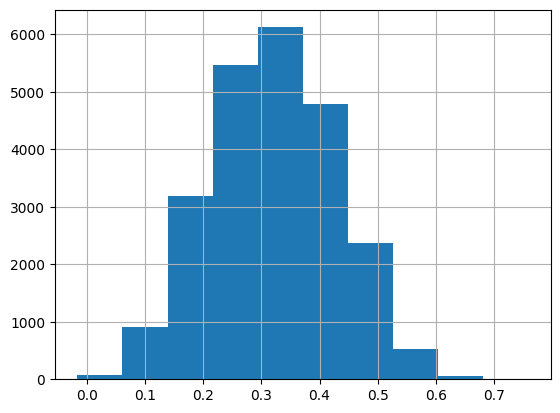

In [89]:
df['positive_score'].hist()

In [77]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [90]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

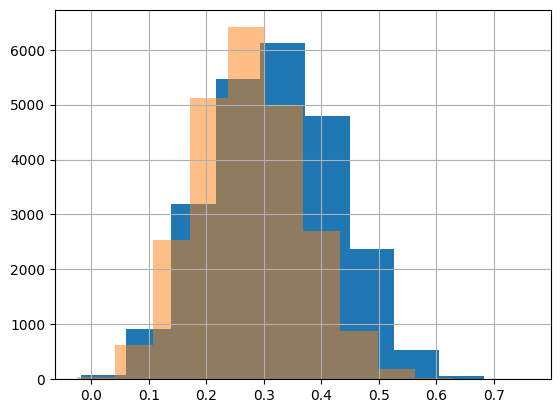

In [91]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [92]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.3209265172481537


In [94]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.2742435932159424


# all-mpnet-base-v2

In [97]:
model = get_base_model('all-mpnet-base-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [98]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [99]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [100]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [101]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

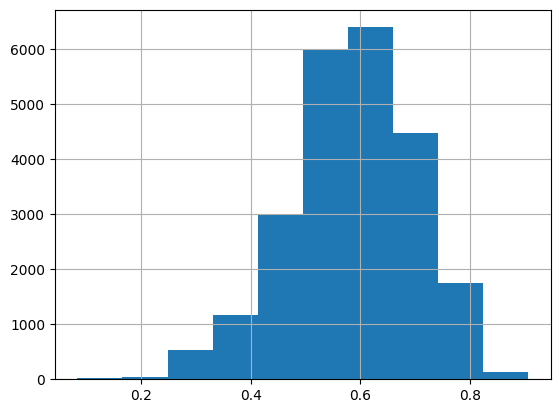

In [102]:
df['positive_score'].hist()

In [103]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [104]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

<Axes: >

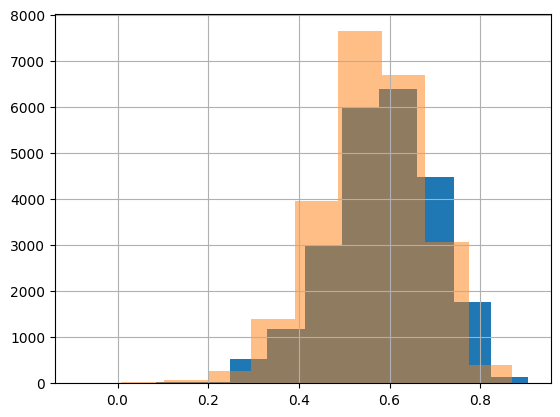

In [105]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [106]:
print(f'Positive score: {df["positive_score"].mean()}')

Positive score: 0.5848382711410522


In [107]:
print(f'Negative score: {df["negative_score"].mean()}')

Negative score: 0.5592855215072632


# paraphrase-multilingual-MiniLM-L12-v2

In [108]:
model = get_base_model('paraphrase-multilingual-MiniLM-L12-v2')

.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [109]:
model.to('cuda')

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [110]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [111]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

  0%|          | 0/23515 [00:00<?, ?it/s]

In [112]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

<Axes: >

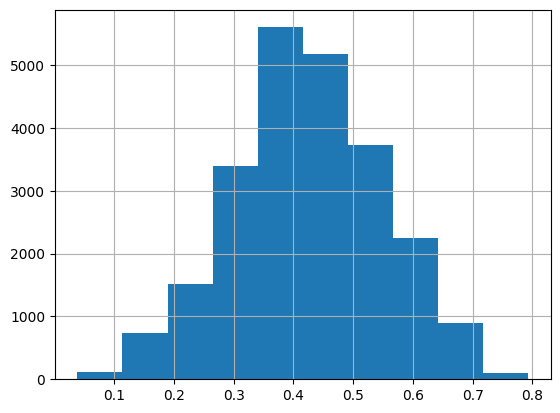

In [113]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')

# distiluse-base-multilingual-cased-v2

In [ ]:
model = get_base_model('distiluse-base-multilingual-cased-v2')

In [ ]:
model.to('cuda')

In [ ]:
df['job_emb'] = df['job_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

In [ ]:
df['resume_emb'] = df['resume_description'].progress_apply(lambda x: model.encode(x, normalize_embeddings=True))

In [ ]:
df['positive_score'] = compute_similarity(df['job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()

In [ ]:
df['negative_job_emb'] = df['Ids'].apply(sample_negative)

In [ ]:
df['negative_score'] = compute_similarity(df['negative_job_emb'], df['resume_emb'])

In [ ]:
df['positive_score'].hist()
df['negative_score'].hist(alpha=0.5)

In [ ]:
print(f'Positive score: {df["positive_score"].mean()}')

In [ ]:
print(f'Negative score: {df["negative_score"].mean()}')